In [16]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit #for data preprocessing and crass validating 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression #logistic Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest 

from statistics import mean
from hyperopt import Trials, hp, fmin, tpe, STATUS_OK, space_eval #for hyperparameter tuning and minimizing

from cyclic_boosting.pipelines import pipeline_CBClassifier
from sklearn.ensemble import HistGradientBoostingRegressor

from datetime import date
from datetime import datetime

import tensorflow as tf

import keras
import keras.layers as layers
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.losses import MeanSquaredError

import itertools
from keras.layers import LSTM

import seaborn as sns 

from scipy.stats import boxcox 
from scipy.special import inv_boxcox

from termcolor import colored


In [17]:
samples = pd.read_csv('preprocessed_lstm.csv')
samples['date'] = pd.to_datetime(samples['date'])
reading_types = pd.read_csv('reading_types.csv')
# samples.info()

df_lst = [(k, v) for k, v in samples.groupby('building_id')]


<class 'pandas.core.frame.DataFrame'>
Index: 7433 entries, 0 to 124275
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1              7433 non-null   float64
 1   2              7433 non-null   float64
 2   3              7433 non-null   float64
 3   4              7433 non-null   float64
 4   5              7433 non-null   float64
 5   6              7433 non-null   float64
 6   7              7433 non-null   float64
 7   8              7433 non-null   float64
 8   9              7433 non-null   float64
 9   10             7433 non-null   float64
 10  11             7433 non-null   float64
 11  12             7433 non-null   float64
 12  day type       7433 non-null   int64  
 13  Fall           7433 non-null   bool   
 14  Spring         7433 non-null   bool   
 15  Summer         7433 non-null   bool   
 16  Winter         7433 non-null   bool   
 17  trimester_day  7433 non-null   int64  
 18  working_hou

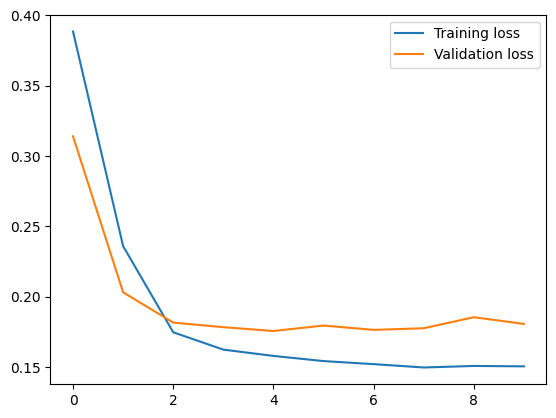

1/1 [==============================] - 1s 1s/step
CO2 ====================================================================================================
MEAN SQUARED ERROR:  2754.5294327915094


C:\Users\Thomas\AppData\Local\Temp\ipykernel_30528\2173257567.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['date']=pd.to_datetime(original['date'])


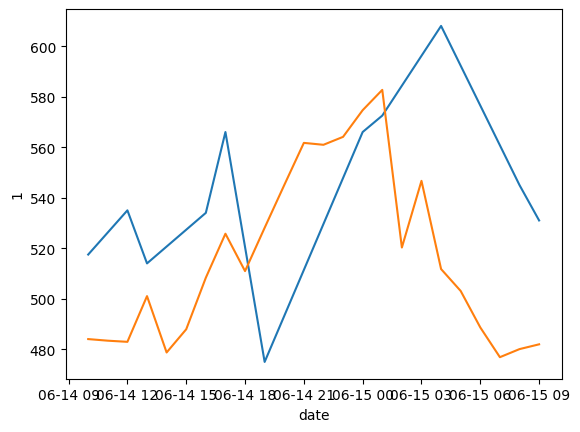

<class 'pandas.core.frame.DataFrame'>
Index: 7433 entries, 0 to 124275
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1              7433 non-null   float64
 1   2              7433 non-null   float64
 2   3              7433 non-null   float64
 3   4              7433 non-null   float64
 4   5              7433 non-null   float64
 5   6              7433 non-null   float64
 6   7              7433 non-null   float64
 7   8              7433 non-null   float64
 8   9              7433 non-null   float64
 9   10             7433 non-null   float64
 10  11             7433 non-null   float64
 11  12             7433 non-null   float64
 12  day type       7433 non-null   int64  
 13  Fall           7433 non-null   bool   
 14  Spring         7433 non-null   bool   
 15  Summer         7433 non-null   bool   
 16  Winter         7433 non-null   bool   
 17  trimester_day  7433 non-null   int64  
 18  working_hou

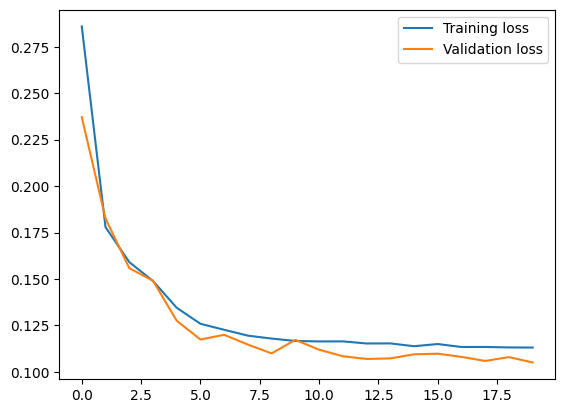

1/1 [==============================] - 2s 2s/step
CO ====================================================================================================
MEAN SQUARED ERROR:  0.08294130876200491


C:\Users\Thomas\AppData\Local\Temp\ipykernel_30528\2173257567.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['date']=pd.to_datetime(original['date'])


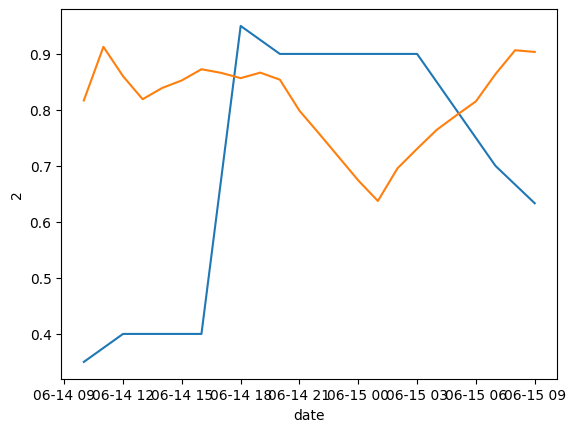

<class 'pandas.core.frame.DataFrame'>
Index: 7433 entries, 0 to 124275
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1              7433 non-null   float64
 1   2              7433 non-null   float64
 2   3              7433 non-null   float64
 3   4              7433 non-null   float64
 4   5              7433 non-null   float64
 5   6              7433 non-null   float64
 6   7              7433 non-null   float64
 7   8              7433 non-null   float64
 8   9              7433 non-null   float64
 9   10             7433 non-null   float64
 10  11             7433 non-null   float64
 11  12             7433 non-null   float64
 12  day type       7433 non-null   int64  
 13  Fall           7433 non-null   bool   
 14  Spring         7433 non-null   bool   
 15  Summer         7433 non-null   bool   
 16  Winter         7433 non-null   bool   
 17  trimester_day  7433 non-null   int64  
 18  working_hou

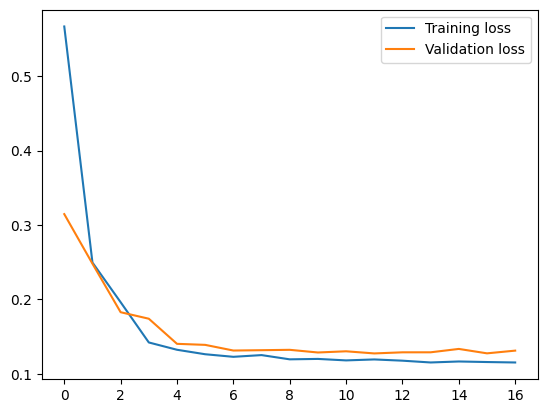

1/1 [==============================] - 1s 978ms/step
TVOC ====================================================================================================
MEAN SQUARED ERROR:  14335.813168081884


C:\Users\Thomas\AppData\Local\Temp\ipykernel_30528\2173257567.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['date']=pd.to_datetime(original['date'])


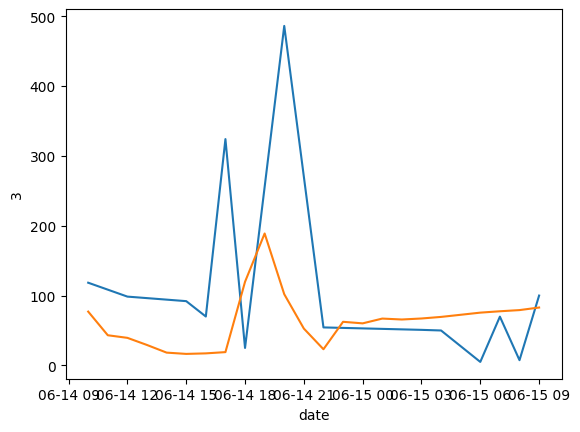

<class 'pandas.core.frame.DataFrame'>
Index: 7433 entries, 0 to 124275
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1              7433 non-null   float64
 1   2              7433 non-null   float64
 2   3              7433 non-null   float64
 3   4              7433 non-null   float64
 4   5              7433 non-null   float64
 5   6              7433 non-null   float64
 6   7              7433 non-null   float64
 7   8              7433 non-null   float64
 8   9              7433 non-null   float64
 9   10             7433 non-null   float64
 10  11             7433 non-null   float64
 11  12             7433 non-null   float64
 12  day type       7433 non-null   int64  
 13  Fall           7433 non-null   bool   
 14  Spring         7433 non-null   bool   
 15  Summer         7433 non-null   bool   
 16  Winter         7433 non-null   bool   
 17  trimester_day  7433 non-null   int64  
 18  working_hou

KeyboardInterrupt: 

In [18]:
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
value_type_ids = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

for building, df in df_lst[0:1]:
    for typeId in value_type_ids:
        train_dates = pd.to_datetime(df['date'])
        multivariate = df.drop(['Unnamed: 0', 'building_id', 'date'], axis = 1)  
        multivariate.info()
        multivariate = multivariate.astype('float32')
        classification_info = multivariate[['day type', 'working_hour']]
        multivariate = multivariate[[typeId]]

        sz = len(multivariate)
        train_sz = int(sz * 0.5)
        test_sz = len(multivariate) - train_sz

        scaler = StandardScaler()  
        scaler = scaler.fit(multivariate) 
        df_scaled = scaler.transform(multivariate)

        train, test = df_scaled[0:train_sz,:], df_scaled[train_sz:sz,:]
        train_class, test_class = classification_info[0: train_sz], classification_info[train_sz:sz]

        test_dates = train_dates[train_sz:sz]

        def create_dataset(dataset, classes, look_back = 1):
            dataX, dataY = [], []
            class_X = []
            for i in range(len(dataset) - look_back - 1):
                a = dataset[i:(i + look_back), :]
                dataX.append(a)
                dataY.append(dataset[i + look_back, :])
                class_X.append(classes.iloc[i + look_back, :])

            return np.array(dataX), np.array(dataY), np.array(class_X)
        
        look_back = 10
        trainX, trainY, train_class = create_dataset(train, train_class, look_back)
        testX, testY, test_class = create_dataset(test, test_class, look_back)
        
        # reshape input to be [samples, time steps, features]
        trainX, trainY, train_class = np.array(trainX), np.array(trainY), np.array(train_class)
        testX, testY, test_class = np.array(testX), np.array(testY), np.array(test_class)

        print('trainX shape == {}.'.format(trainX.shape))
        print('trainY shape == {}.'.format(trainY.shape)) 
        print('train_class shape == {}.'.format(train_class.shape))

        value_input = keras.Input(shape = (trainX.shape[1], trainX.shape[2]), name = "values")
        lstm1_value = layers.LSTM(150, return_sequences = True)(value_input)
        lstm2_value = layers.LSTM(50, return_sequences = False)(lstm1_value)
        # bn_value = layers.BatchNormalization()(lstm2_value)
        # output_value = layers.Dense(1, activation = 'linear')(bn_value)

        classification_input = keras.Input(shape = (train_class.shape[1],), name = "class")

        x = layers.concatenate([lstm2_value, classification_input])
        dense_layer = layers.Dense(30, activation = 'relu')(x)
        # batch_norm = layers.BatchNormalization()(x)
        val_pred = layers.Dense(1, activation = 'linear', name = "output")(dense_layer)

        model = keras.Model(inputs = [value_input, classification_input], outputs = val_pred)


        early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

        model.compile(optimizer= tf.keras.optimizers.Adam(), loss = {"output": tf.keras.losses.Huber() } )

        history = model.fit({
            "values": trainX, 
            "class": train_class
        }, {
            "output": trainY
        }, batch_size = 64, validation_split = 0.2, epochs = 20, verbose = 1, callbacks = [early_stop])
        
        # plt.figure(figsize = (18, 10))
        plt.plot(history.history['loss'], label='Training loss')
        plt.plot(history.history['val_loss'], label='Validation loss')
        plt.legend()
        plt.show()
        plt.clf()
        plt.cla()
        plt.close()

        predict_range = 24
        test_dates = test_dates[0:predict_range]

        n_future = pd.date_range(test_dates.iloc[0], periods = predict_range, freq = 'H').tolist()

        prediction = model.predict({"values": testX[-predict_range:], "class": test_class[-predict_range:]})

        # col = 3

        y_pred_future = scaler.inverse_transform(prediction)[:, 0]
        # print(y_pred_future)

        #inverse boxcox
        # y_pred_future = inv_boxcox(y_pred_future, fitted_lambda)
        # y_pred_future = np.vectorize(lambda x: x - 1e-6)(y_pred_future)
        # # y_pred_future = y_pred_future[0] - 1e-6

        forecast_dates = []
        for time_i in n_future:
            forecast_dates.append(time_i)


        df_forecast = pd.DataFrame({'date':np.array(forecast_dates), reading_types.at[int(typeId) - 1, 'reading_type_name']:y_pred_future})
        df_forecast['date']=pd.to_datetime(df_forecast['date'])

        original = df[['date', typeId]]
        original['date']=pd.to_datetime(original['date'])
        original = original[train_sz:train_sz + predict_range]

        print(reading_types.at[int(typeId) - 1, 'reading_type_name'], '='*100)

        # print(trainX[-predict_range:])
        # print(df[train_sz-predict_range:train_sz])
        # print(df_forecast)
        # print(original)
        # print("original", '-'*80)
        # print(original.head(24))

        # print("df_forecast", '-'*80)
        # print(df_forecast.head(24))

        # original.set_index('date')
        # df_forecast.set_index('date')

        print(colored("MEAN SQUARED ERROR: ", 'red'), mean_squared_error(original[typeId], df_forecast[reading_types.at[int(typeId) - 1, 'reading_type_name']]))

        # plt.figure(figsize=(18,8))
        # plt.plot(original[typeId],label = "original")
        # plt.plot(df_forecast[reading_types.at[int(typeId) - 1, 'reading_type_name']],label = "predicted")
        # plt.title("Time Series Forecast")
        # plt.xlabel("Date")
        # plt.ylabel(reading_types.at[int(typeId) - 1, 'reading_type_name'])
        # plt.legend()
        # plt.show()

        sns.lineplot(data= original, x = 'date', y = typeId)
        sns.lineplot(data = df_forecast, x = 'date', y =  reading_types.at[int(typeId) - 1, 'reading_type_name'])
        plt.show()